# Análisis y procesamiento de señales - Trabajo semanal Nº5
# Aramayo Yohana Valentina #

Se pide:

1) Realizar la estimación de la densidad espectral de potencia (PSD) de cada señal mediante alguno de los métodos vistos en clase (Periodograma ventaneado, Welch, Blackman-Tukey).

2) Realice una estimación del ancho de banda de cada señal y presente los resultados en un tabla para facilitar la comparación.

En el primer codigo calculo BW para las primeras 12000 muestras y en el segundo para todas las muestras

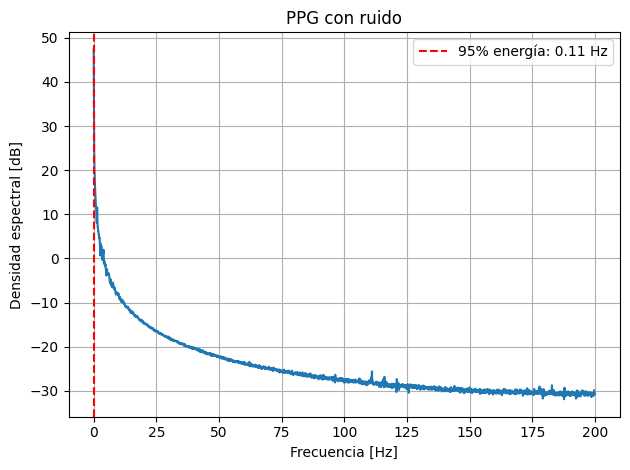

Frecuencia al 95% de la energía acumulada: 0.11 Hz


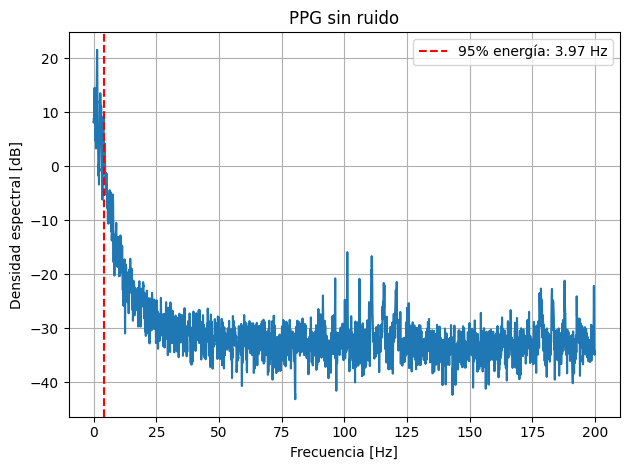

Frecuencia al 95% de la energía acumulada: 3.97 Hz


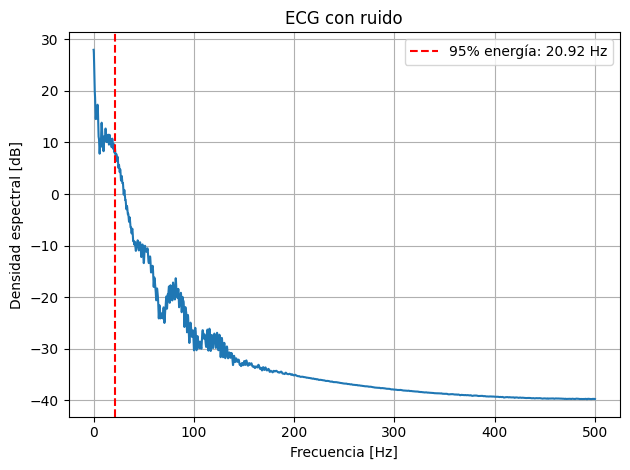

Frecuencia al 95% de la energía acumulada: 20.92 Hz


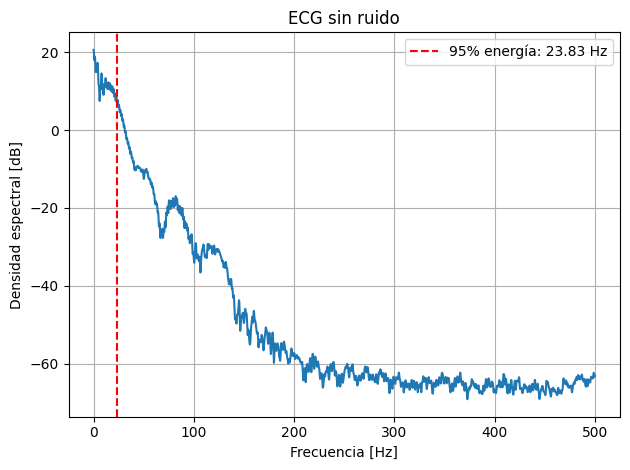

Frecuencia al 95% de la energía acumulada: 23.83 Hz


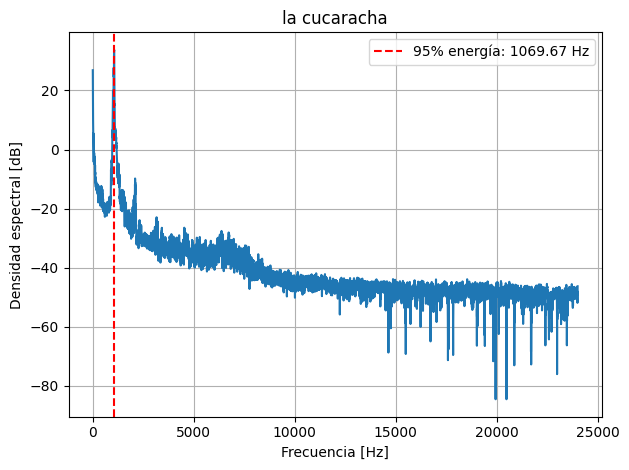

Frecuencia al 95% de la energía acumulada: 1069.67 Hz


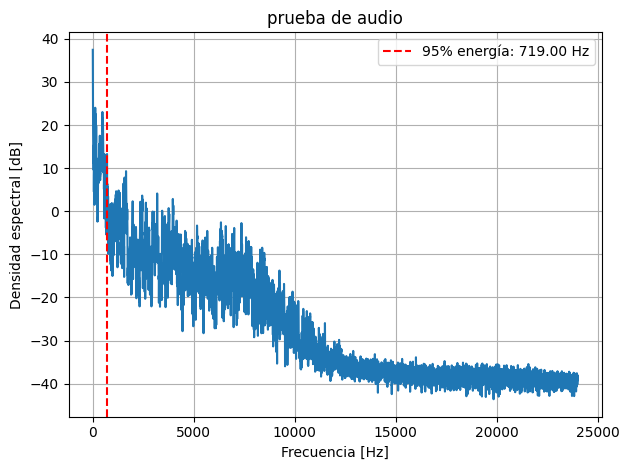

Frecuencia al 95% de la energía acumulada: 719.00 Hz


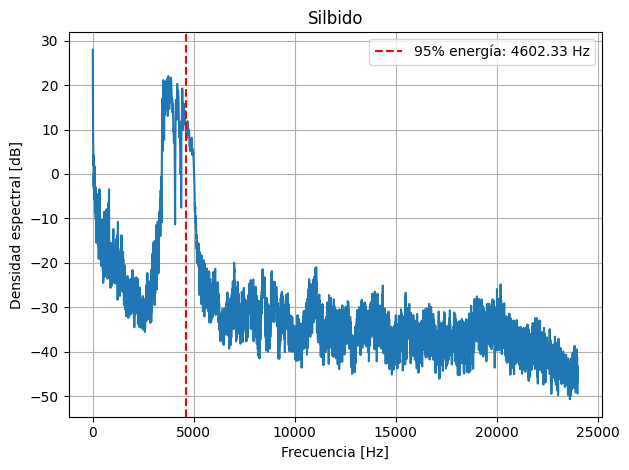

Frecuencia al 95% de la energía acumulada: 4602.33 Hz


,Ancho de Banda al 95% [Hz]
ECG c/ruido,20.916667
ECG s/ruido,23.833333
PPG c/ruido,0.105916
PPG s/ruido,3.971593
La cucaracha,1069.666667
Prueba de audio,719.000000
Silbido,4602.333333


In [4]:
# -*- coding: utf-8 -*-
"""
Created on Sat May 10 10:59:23 2025

@author: Usuario
"""


import numpy as np
from scipy import signal as sig

import matplotlib.pyplot as plt
   
import scipy.io as sio
from scipy.io.wavfile import write

def vertical_flaten(a):

    return a.reshape(a.shape[0],1)

def blackman_tukey(x,  M = None):    
    
    # N = len(x)
    x_z = x.shape
    
    N = np.max(x_z)
    
    if M is None:
        M = N//5
    
    r_len = 2*M-1

    # hay que aplanar los arrays por np.correlate.
    # usaremos el modo same que simplifica el tratamiento
    # de la autocorr
    xx = x.ravel()[:r_len];

    r = np.correlate(xx, xx, mode='same') / r_len

    Px = np.abs(np.fft.fft(r * sig.windows.blackman(r_len), n = N) )

    Px = Px.reshape(x_z)

    return Px;

def procesar_señal(señal, fs, titulo="PSD de la señal "):
    """
    Procesa una señal : normaliza, calcula PSD por Blackman-Tukey, grafica y devuelve info clave.

    Retorna:
    - psd: densidad espectral de potencia
    - ff: eje de frecuencias
    - f_95: frecuencia donde se alcanza el 95% de la energía acumulada
    - energia_total: energía total del espectro
    - energia_acumulada: vector de energía acumulada (normalizada)
    """

    señal = señal / np.std(señal)

    N = len(señal)
    df = fs / N
    ff = np.linspace(0, fs, N, endpoint=False)

    psd = blackman_tukey(señal, N // 10)



    # Cálculo de energía acumulada
    psd_half = psd[:N//2].ravel()
    ff_half = ff[:N//2]

    energia_total = np.sum(psd_half)
    energia_acumulada = np.cumsum(psd_half) / energia_total
    indice_95 = np.where(energia_acumulada >= 0.95)[0][0]
    f_95 = ff_half[indice_95]

    # Gráfico
    plt.plot(ff[:N//2], 10 * np.log10(np.abs(psd[:N//2]) + 1e-10))
    plt.axvline(x=f_95, color='r', linestyle='--', label=f'95% energía: {f_95:.2f} Hz')
    plt.title(titulo)
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Densidad espectral [dB]')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    print(f"Frecuencia al 95% de la energía acumulada: {f_95:.2f} Hz")

    return psd, ff, f_95, energia_total, energia_acumulada

#%%

####################################
# Lectura de pletismografía (PPG)  #
####################################

fs_ppg = 400 # Hz

##################
## PPG con ruido##
##################

# # Cargar el archivo CSV como un array de NumPy
ppg_c_ruido = np.genfromtxt('PPG.csv', delimiter=',', skip_header=1)  # Omitir la cabecera si existe
psd_c, ff_c, f_95_c_ppg, energia_tot_c, energia_acum_c = procesar_señal(ppg_c_ruido, fs=400, titulo="PPG con ruido")


##################
## PPG sin ruido
##################

ppg_s_ruido = np.load('ppg_sin_ruido.npy')

# plt.figure()
# plt.plot(ppg)
# Tamaño y frecuencia
####################################
# Estimación de BW de pletismografía (PPG)  #
####################################
# PPG sin ruido

psd_s, ff_s, f_95_s_ppg, energia_tot_s, energia_acum_s = procesar_señal(ppg_s_ruido, fs=400, titulo="PPG sin ruido")

##################
## ECG con ruido
##################
# para listar las variables que hay en el archivo

mat_struct = sio.loadmat('./ECG_TP4.mat')
ecg_c_ruido = vertical_flaten(mat_struct['ecg_lead'])
# Extraer la señal de ECG
ecg_c_ruido = mat_struct['ecg_lead'].reshape(-1, 1)  # Asegúrate de usar la variable correcta que contiene el ECG

# plt.figure()
# plt.plot(ecg)
#primeras 12k muestras
ecg_c_ruido= ecg_c_ruido[:12000]
psd_s, ff_s, f_95_c_ecg, energia_tot_s, energia_acum_c_ECG = procesar_señal(ecg_c_ruido, fs=1000, titulo="ECG con ruido")


##################
## ECG sin ruido
##################

ecg_s_ruido = np.load('ecg_sin_ruido.npy')
ecg_s_ruido= ecg_s_ruido[:12000]
psd_s, ff_s, f_95_s_ecg, energia_tot_s, energia_acum_s_ECG = procesar_señal(ecg_s_ruido, fs=1000, titulo="ECG sin ruido")

####################
# Lectura de audio #
####################

# Cargar el archivo CSV como un array de NumPy
fs_audio, wav_data = sio.wavfile.read('la cucaracha.wav')
psd_cuca, ff_cuca, f_95_cuca, energia_tot_cuca, energia_acum_cuca = procesar_señal(wav_data, fs_audio, titulo="la cucaracha")
fs_audio2, wav_data2 = sio.wavfile.read('prueba psd.wav')
psd_prueba, ff_prueba, f_95_prueba, energia_tot_prueba, energia_acum_prueba = procesar_señal(wav_data2, fs_audio2, titulo="prueba de audio")
fs_audio3, wav_data3 = sio.wavfile.read('silbido.wav')
psd_silbido, ff_silbido, f_95_silbido, energia_tot_silbido, energia_acum_silbido= procesar_señal(wav_data3, fs_audio3, titulo="Silbido")

import pandas as pd

# Crear el DataFrame con una sola columna para los anchos de banda
tabla3 = pd.DataFrame({
    "Ancho de Banda al 95% [Hz]": [
        f_95_c_ecg,     # ECG con ruido
        f_95_s_ecg,     # ECG sin ruido
        f_95_c_ppg,     # PPG con ruido
        f_95_s_ppg,     # PPG sin ruido
        f_95_cuca,      # Audio: La cucaracha
        f_95_prueba,    # Audio: Prueba
        f_95_silbido    # Audio: Silbido
    ]
}, index=[
    "ECG c/ruido", 
    "ECG s/ruido", 
    "PPG c/ruido", 
    "PPG s/ruido", 
    "La cucaracha", 
    "Prueba de audio", 
    "Silbido"
])

# Estilo para la tabla
tabla3.style.set_caption("Estimación de Ancho de Banda al 95% de Energía") \
     .format("{:.6f}") \
     .set_table_styles([{
         "selector": "caption", 
         "props": [("font-size", "16px"), ("font-weight", "bold")]
     }])



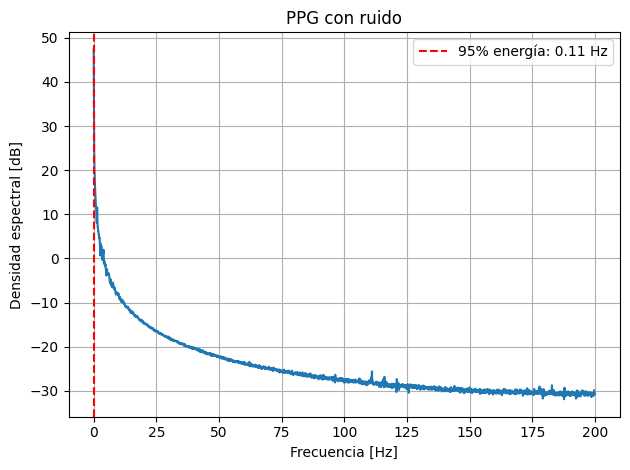

Frecuencia al 95% de la energía acumulada: 0.11 Hz


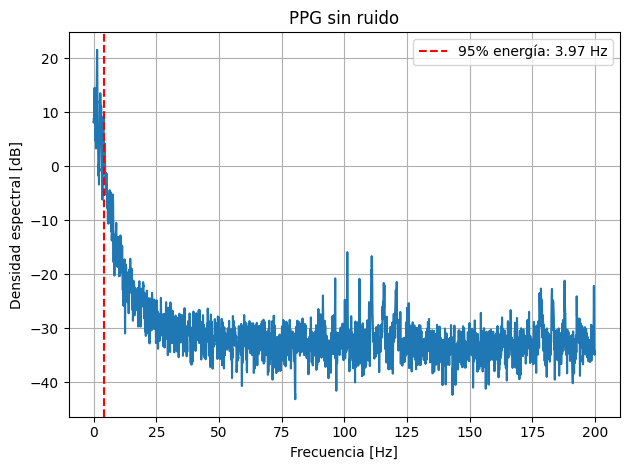

Frecuencia al 95% de la energía acumulada: 3.97 Hz


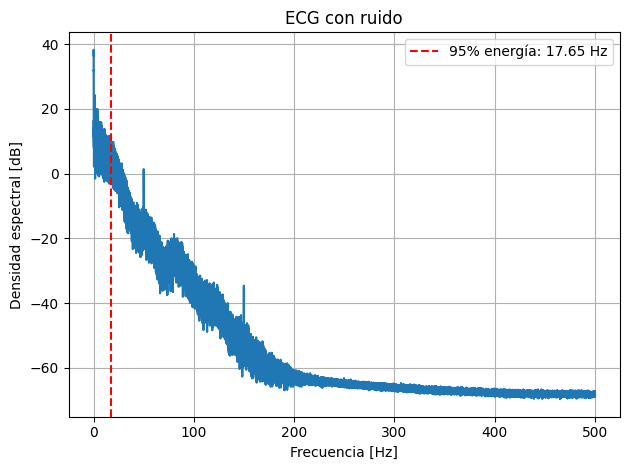

Frecuencia al 95% de la energía acumulada: 17.65 Hz


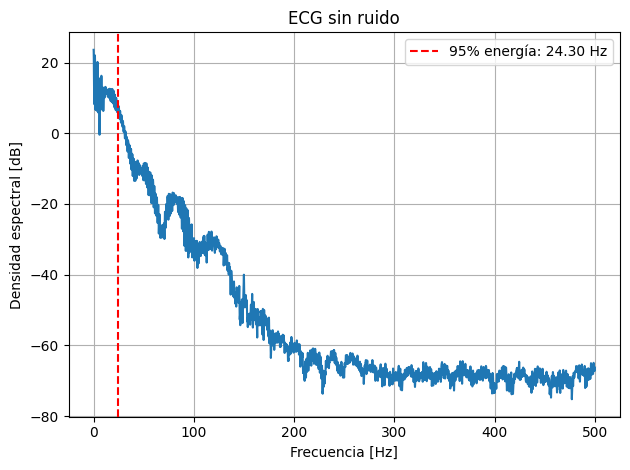

Frecuencia al 95% de la energía acumulada: 24.30 Hz


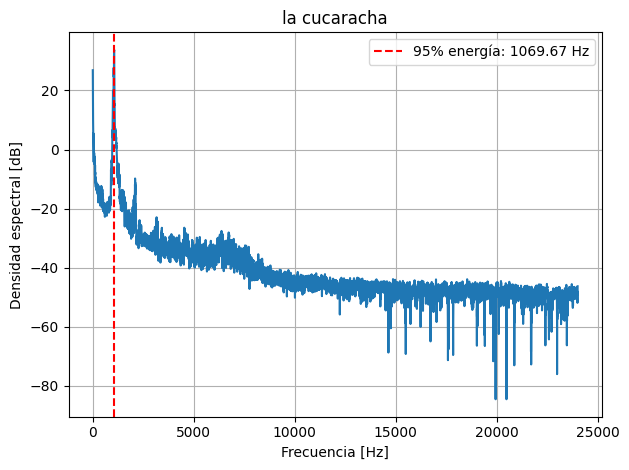

Frecuencia al 95% de la energía acumulada: 1069.67 Hz


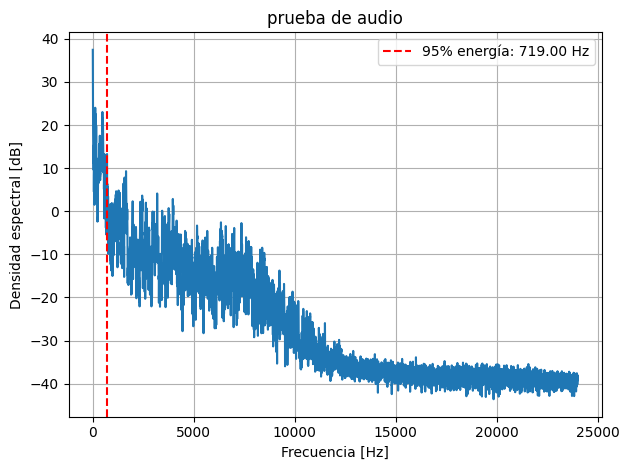

Frecuencia al 95% de la energía acumulada: 719.00 Hz


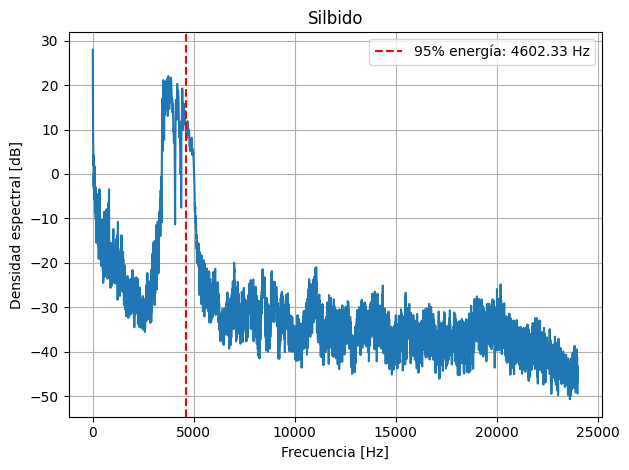

Frecuencia al 95% de la energía acumulada: 4602.33 Hz


,Ancho de Banda al 95% [Hz]
ECG c/ruido,17.654519
ECG s/ruido,24.300000
PPG c/ruido,0.105916
PPG s/ruido,3.971593
La cucaracha,1069.666667
Prueba de audio,719.000000
Silbido,4602.333333


In [5]:
# -*- coding: utf-8 -*-
"""
Created on Sat May 10 10:59:23 2025

@author: Usuario
"""


import numpy as np
from scipy import signal as sig

import matplotlib.pyplot as plt
   
import scipy.io as sio
from scipy.io.wavfile import write

def vertical_flaten(a):

    return a.reshape(a.shape[0],1)

def blackman_tukey(x,  M = None):    
    
    # N = len(x)
    x_z = x.shape
    
    N = np.max(x_z)
    
    if M is None:
        M = N//5
    
    r_len = 2*M-1

    # hay que aplanar los arrays por np.correlate.
    # usaremos el modo same que simplifica el tratamiento
    # de la autocorr
    xx = x.ravel()[:r_len];

    r = np.correlate(xx, xx, mode='same') / r_len

    Px = np.abs(np.fft.fft(r * sig.windows.blackman(r_len), n = N) )

    Px = Px.reshape(x_z)

    return Px;

def procesar_señal(señal, fs, titulo="PSD de la señal "):
    """
    Procesa una señal : normaliza, calcula PSD por Blackman-Tukey, grafica y devuelve info clave.

    Retorna:
    - psd: densidad espectral de potencia
    - ff: eje de frecuencias
    - f_95: frecuencia donde se alcanza el 95% de la energía acumulada
    - energia_total: energía total del espectro
    - energia_acumulada: vector de energía acumulada (normalizada)
    """

    señal = señal / np.std(señal)

    N = len(señal)
    df = fs / N
    ff = np.linspace(0, fs, N, endpoint=False)

    psd = blackman_tukey(señal, N // 10)



    # Cálculo de energía acumulada
    psd_half = psd[:N//2].ravel()
    ff_half = ff[:N//2]

    energia_total = np.sum(psd_half)
    energia_acumulada = np.cumsum(psd_half) / energia_total
    indice_95 = np.where(energia_acumulada >= 0.95)[0][0]
    f_95 = ff_half[indice_95]

    # Gráfico
    plt.plot(ff[:N//2], 10 * np.log10(np.abs(psd[:N//2]) + 1e-10))
    plt.axvline(x=f_95, color='r', linestyle='--', label=f'95% energía: {f_95:.2f} Hz')
    plt.title(titulo)
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Densidad espectral [dB]')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    print(f"Frecuencia al 95% de la energía acumulada: {f_95:.2f} Hz")

    return psd, ff, f_95, energia_total, energia_acumulada

#%%

####################################
# Lectura de pletismografía (PPG)  #
####################################

fs_ppg = 400 # Hz

##################
## PPG con ruido##
##################

# # Cargar el archivo CSV como un array de NumPy
ppg_c_ruido = np.genfromtxt('PPG.csv', delimiter=',', skip_header=1)  # Omitir la cabecera si existe
psd_c, ff_c, f_95_c_ppg, energia_tot_c, energia_acum_c = procesar_señal(ppg_c_ruido, fs=400, titulo="PPG con ruido")


##################
## PPG sin ruido
##################

ppg_s_ruido = np.load('ppg_sin_ruido.npy')

# plt.figure()
# plt.plot(ppg)
# Tamaño y frecuencia
####################################
# Estimación de BW de pletismografía (PPG)  #
####################################
# PPG sin ruido

psd_s, ff_s, f_95_s_ppg, energia_tot_s, energia_acum_s = procesar_señal(ppg_s_ruido, fs=400, titulo="PPG sin ruido")

##################
## ECG con ruido
##################
# para listar las variables que hay en el archivo

mat_struct = sio.loadmat('./ECG_TP4.mat')
ecg_c_ruido = vertical_flaten(mat_struct['ecg_lead'])
# Extraer la señal de ECG
ecg_c_ruido = mat_struct['ecg_lead'].reshape(-1, 1)  # Asegúrate de usar la variable correcta que contiene el ECG

# plt.figure()
# plt.plot(ecg)
#primeras 12k muestras
# ecg_c_ruido= ecg_c_ruido[:12000]
psd_s, ff_s, f_95_c_ecg, energia_tot_s, energia_acum_c_ECG = procesar_señal(ecg_c_ruido, fs=1000, titulo="ECG con ruido")


##################
## ECG sin ruido
##################

ecg_s_ruido = np.load('ecg_sin_ruido.npy')
# ecg_s_ruido= ecg_s_ruido[:12000]
psd_s, ff_s, f_95_s_ecg, energia_tot_s, energia_acum_s_ECG = procesar_señal(ecg_s_ruido, fs=1000, titulo="ECG sin ruido")

####################
# Lectura de audio #
####################

# Cargar el archivo CSV como un array de NumPy
fs_audio, wav_data = sio.wavfile.read('la cucaracha.wav')
psd_cuca, ff_cuca, f_95_cuca, energia_tot_cuca, energia_acum_cuca = procesar_señal(wav_data, fs_audio, titulo="la cucaracha")
fs_audio2, wav_data2 = sio.wavfile.read('prueba psd.wav')
psd_prueba, ff_prueba, f_95_prueba, energia_tot_prueba, energia_acum_prueba = procesar_señal(wav_data2, fs_audio2, titulo="prueba de audio")
fs_audio3, wav_data3 = sio.wavfile.read('silbido.wav')
psd_silbido, ff_silbido, f_95_silbido, energia_tot_silbido, energia_acum_silbido= procesar_señal(wav_data3, fs_audio3, titulo="Silbido")

import pandas as pd

# Crear el DataFrame con una sola columna para los anchos de banda
tabla3 = pd.DataFrame({
    "Ancho de Banda al 95% [Hz]": [
        f_95_c_ecg,     # ECG con ruido
        f_95_s_ecg,     # ECG sin ruido
        f_95_c_ppg,     # PPG con ruido
        f_95_s_ppg,     # PPG sin ruido
        f_95_cuca,      # Audio: La cucaracha
        f_95_prueba,    # Audio: Prueba
        f_95_silbido    # Audio: Silbido
    ]
}, index=[
    "ECG c/ruido", 
    "ECG s/ruido", 
    "PPG c/ruido", 
    "PPG s/ruido", 
    "La cucaracha", 
    "Prueba de audio", 
    "Silbido"
])

# Estilo para la tabla
tabla3.style.set_caption("Estimación de Ancho de Banda al 95% de Energía") \
     .format("{:.6f}") \
     .set_table_styles([{
         "selector": "caption", 
         "props": [("font-size", "16px"), ("font-weight", "bold")]
     }])

